# Destek Vektör Regresyonu(SVR)

***Amaç, bir marjin aralığına maksimum noktayı en küçük hata ile alınabilicek şekilde doğru ya da eğriyi belirlemektir.***

***Robas Regresyon:*** _Aykırılıklara(çok boyutluluk laneti vb) karşı daha az duyarlı olan, bunlarla mücadele edebilen algoritmalara robas(dayanıklı) algoritmalar denir._

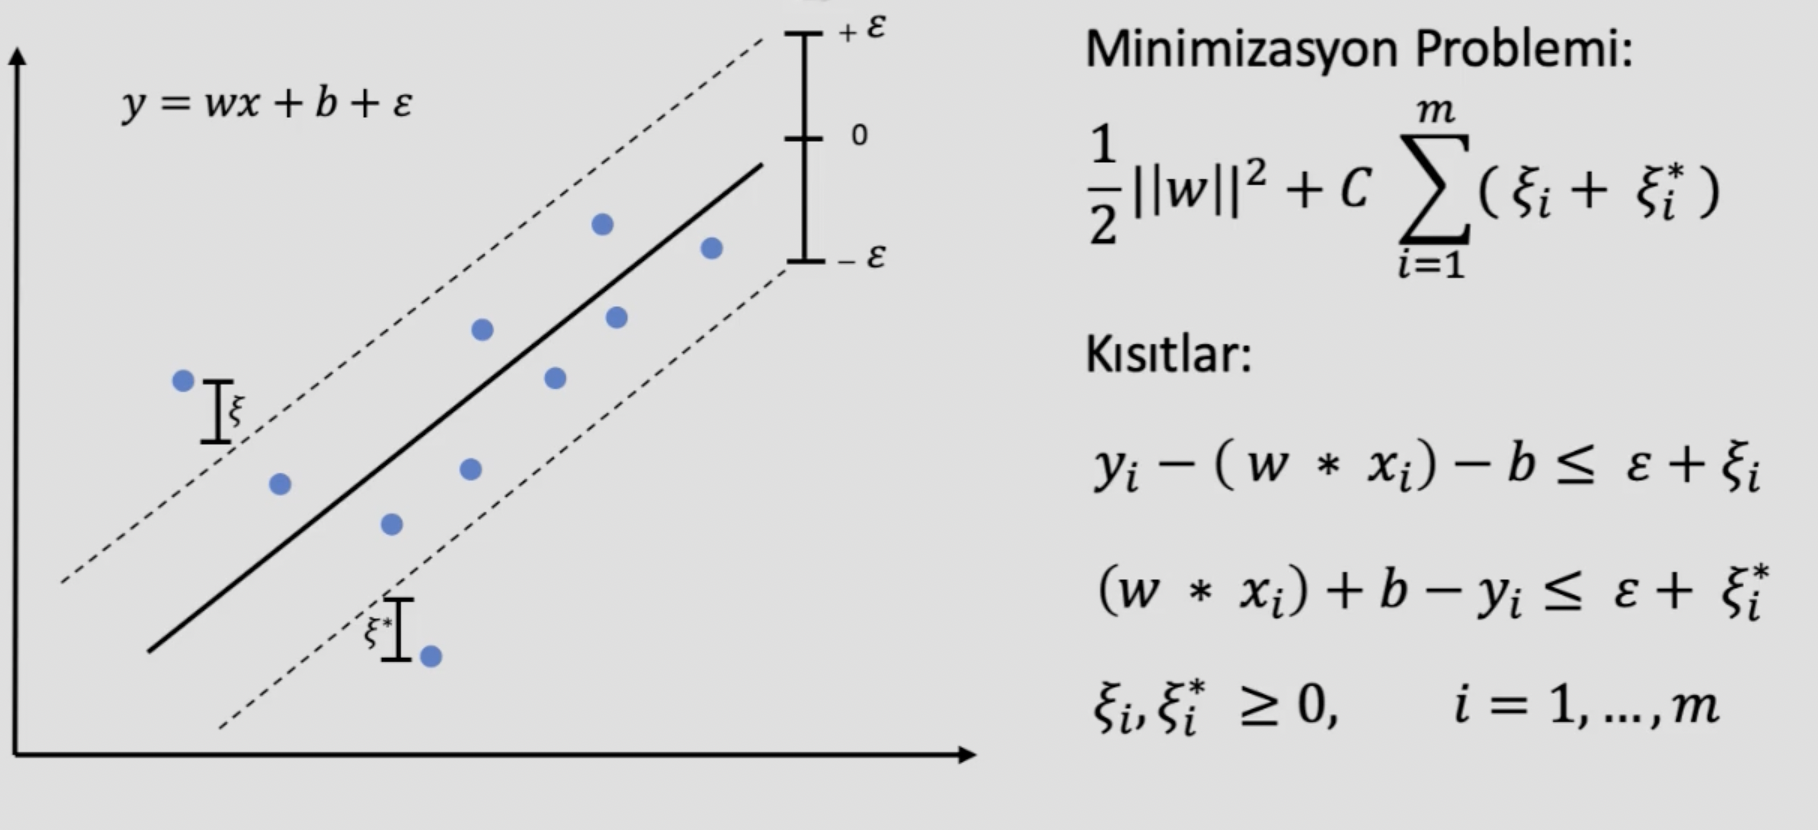

**Kısıtlar:** _Öyle bir regresyon modeli bulmana yardımcı olacağım ki gerçek değerler ile tahmin edilen değerler arasındaki farklar regresyon eğrisinin iki yönünden belirli bir Epsilon ve ksi değerinden daha uzakta olmayacak._

# Model

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
from sklearn.svm import SVR

In [5]:
svr_model = SVR("linear").fit(X_train, y_train)

In [6]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [7]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122206 x


In [8]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [9]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [10]:
y_pred = svr_model.predict(X_train)

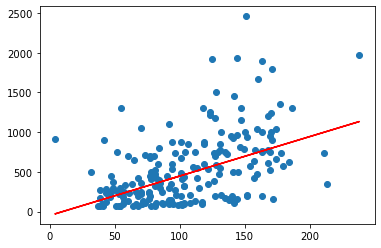

In [11]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = "r");

In [12]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [13]:
-8.814095480334345 + 5.172456135470686*91

461.87941284749803

Text(0, 0.5, 'Maaş (Salary)')

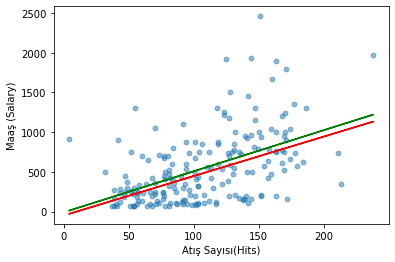

In [14]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

***Aykırı gözlemlerin etkisi SVR'da daha düşük olduğu için BDS'den daha alttan doğru oluşturur.***

# Tahmin

In [15]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0],
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122206 x


In [16]:
svr_model.predict([[91]])

array([403.52804878])

In [17]:
y_pred = svr_model.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

# Model Tuning

In [19]:
svr_model

SVR(kernel='linear')

In [20]:
svr_params = {"C" : np.arange(0.1,2,0.1)}

In [21]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [22]:
svr_cv_model.best_params_

{'C': 0.1}

In [23]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [24]:
svr_tuned = SVR("linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [25]:
y_pred = svr_tuned.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# Doğrusal Olmayan SVR

In [28]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [29]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

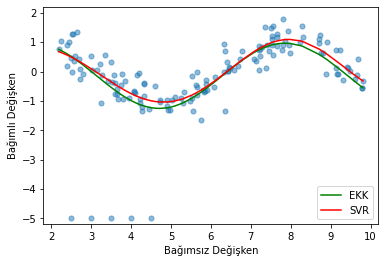

In [30]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

# Model (Hitters)

In [5]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [6]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

# Tahmin

In [7]:
y_pred = svr_rbf.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

# Model Tuning

In [9]:
svr_rbf

SVR()

In [10]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [12]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [21]:
svr_tuned = SVR("rbf", 
               C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,
                                                               y_train)

In [22]:
y_pred = svr_tuned.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694